In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.ticker as plticker
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import glob

from libanalysis import *
%matplotlib notebook

In [2]:
%load_ext autoreload
%autoreload 2

In [20]:
%reload_ext autoreload

<IPython.core.display.Javascript object>


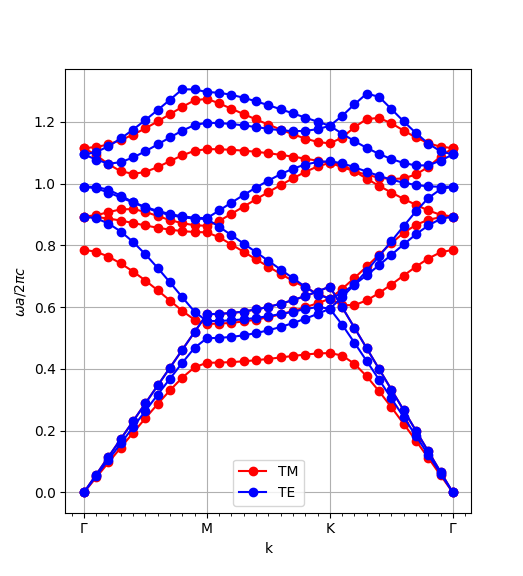

In [2]:
def plot_band_hex_cyl(numbands=7):
    '''
    numbands: number of bands plotted. The maximum input value is determined by the number of bands simulated in MPB
    '''
    tm_bands_import= np.genfromtxt("../Simulation-results/MPB/2d-hexagonal/glass-hexagonal-cyl-bands.tm.dat", skip_header=1, delimiter=",", dtype="str")
    te_bands_import= np.genfromtxt("../Simulation-results/MPB/2d-hexagonal/glass-hexagonal-cyl-bands.te.dat", skip_header=1, delimiter=",", dtype="str")
    tm_bands_data = tm_bands_import[:,5:].astype(float)
    te_bands_data = te_bands_import[:,5:].astype(float)
    # k= tm_bands_import[:,5:].astype(float)

    fig = plt.figure( figsize= 1.2*plt.figaspect(1.1))
    ax1= fig.add_subplot(1,1,1)
    for tm_band in tm_bands_data.T[:numbands] :
        ax1.plot(tm_band, marker="o", linestyle="-", color="red", label="TM")
    for te_band in te_bands_data.T[:numbands] :
        ax1.plot(te_band, marker="o", linestyle="-", color="blue", label="TE")

        
    ax1.set_ylabel(r"$\omega a / 2\pi c$")
    ax1.set_xlabel(r"k")
    #ax1.plot(tm_band1, markerstyle="o")

    ax1.set_xticklabels([])
#     ax1.set_xlim(left=0)
#     ax1.set_ylim(bottom=0)

#     # Gamma X M R  X Gamma Z R T Z Gamma
    k_points = ["", r"$\Gamma$" , r"M", r"K", r"$\Gamma$"]

#     # http://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot
#     #Spacing between each line
#     #intervals = float(5)
    intervals = float(10)
    loc = plticker.MultipleLocator(base=intervals)
#     # matplotlib.ticker.IndexLocator(base, offset)  would be better for index plotting
    ax1.xaxis.set_major_locator(loc)
    ax1.xaxis.set_minor_locator(plticker.MultipleLocator(1))
    ax1.grid(which='major', axis='both', linestyle='-')
    ax1.set_xticklabels(k_points)
    
    
    # Custom Labels
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend([ handles[0], handles[numbands] ], [ labels[0], labels[numbands] ])
    

plot_band_hex_cyl()


<IPython.core.display.Javascript object>


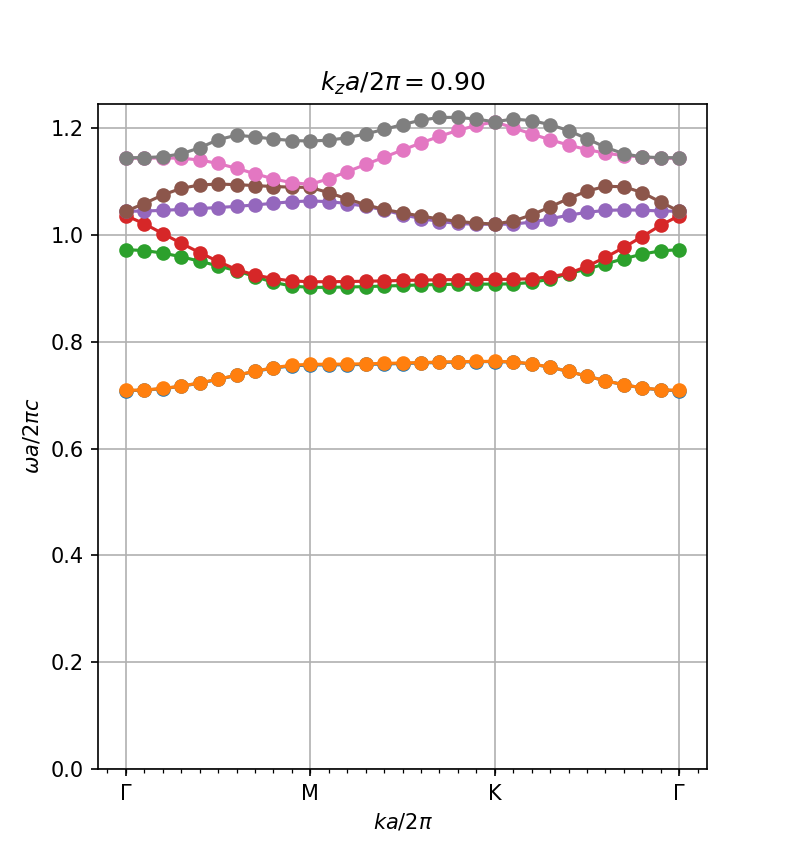

In [3]:
plot_bands_at_fixed_kz("../Simulation-results/MPB/2d-hexagonal/varied_k_z_optimized_r/", k_point_labels=[r"$\Gamma$", r"M", r"K", r"$\Gamma$"])

<IPython.core.display.Javascript object>


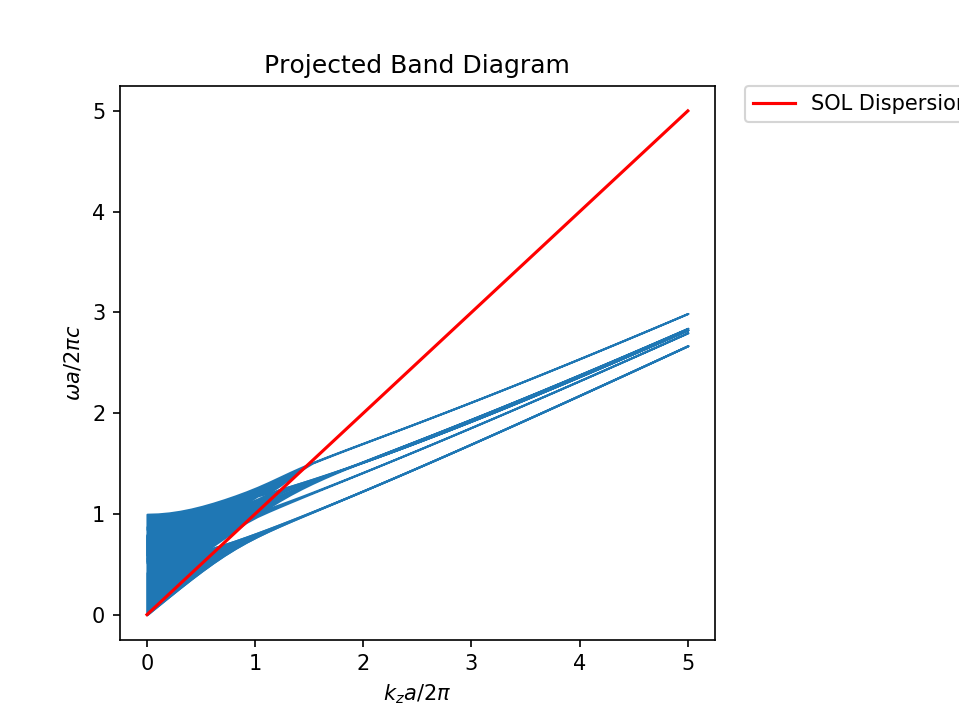

In [11]:
fig_projected, ax_projected = plot_projected_bands("../Simulation-results/MPB/2d-hexagonal/varied_k_z_r_0.245/")    

<IPython.core.display.Javascript object>


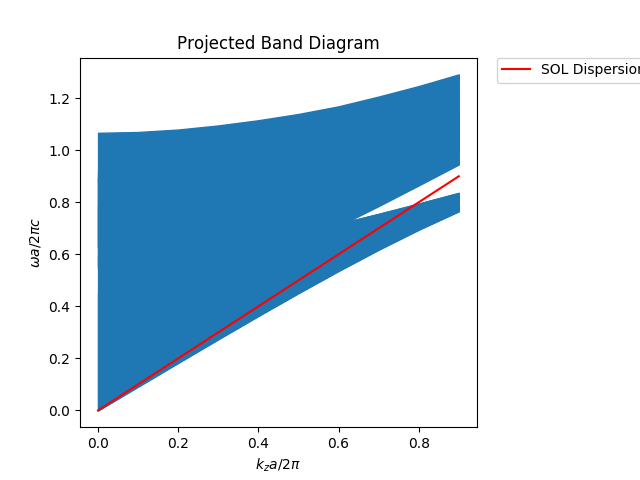

In [5]:
fig_projected, ax_projected = plot_projected_bands("../Simulation-results/MPB/2d-hexagonal/varied_k_z_r_0.2_old/")    

In [ ]:
def plot_single_band(fname, num_kz=10):
    '''
    fname: filename of the full set of frequencies together with the wavevectors. It has the following structure:
        for a fixed longitudinal wavevector kz the transverse wavector - those of the lattice periodicty - are 
        varied and the frequency is stored. After that the longitudinal wavevector is changed and for this kz the
        transverse components are varied again
    num_kz: number of kz over which the simulation was stepped
    '''
    # "2d-hexagonal/varied_k_z/"
    data= np.loadtxt(fname, delimiter=',')
    if data.shape[0] % num_kz != 0:
        print('wrong number of kz! break')
        return
    data= data.reshape(num_kz, data.shape[0]//num_kz, data.shape[1]) 
    data= data[data[:,0,2].argsort()]  # making sure the kz's are in the right order
    
    fig = plt.figure( figsize= 1.2*plt.figaspect(1.1))
    ax= fig.add_subplot(1,1,1)
    line1, = ax.plot(data[0,:,3], marker="o", linestyle="-")    
    k_points = ["", r"$\Gamma$" , r"M", r"K", r"$\Gamma$"]

    num_interpolate= (data.shape[1]-len(k_points)+1)/ (len(k_points)-1)

#     # http://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot
#     #Spacing between each line
#     #intervals = float(5)
    intervals = float(10)
    loc = plticker.MultipleLocator(base=intervals)
#     # matplotlib.ticker.IndexLocator(base, offset)  would be better for index plotting
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_minor_locator(plticker.MultipleLocator(1))
    ax.grid(which='major', axis='both', linestyle='-')
    ax.set_xticklabels(k_points)
    
    
    def update_by_kz(index_kz):
#         ax.clear()
        line1.set_ydata(data[index_kz,:,3])
        ax.relim()
        ax.autoscale_view()
        ax.set_ylim(0, None, auto=True)
#         
        fig.canvas.draw()
        
#         ax.plot(data[index_kz,:,3], marker="o", linestyle="-")
#         fig.draw()
    
    interact(update_by_kz, index_kz=widgets.IntSlider(min=0,max=num_kz-1,step=1,value=0))

   
plot_single_band('../Simulation-results/MPB/2d-hexagonal/varied_k_z/1.band.dat')

<IPython.core.display.Javascript object>


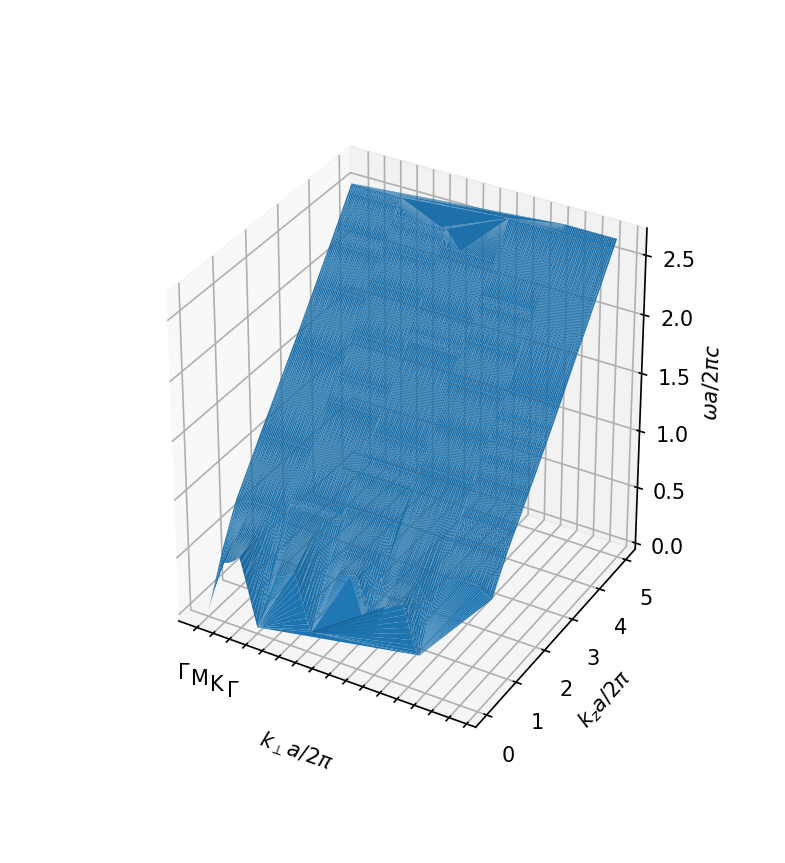

In [9]:
def plot_single_band_all(fname, num_kz=10):
    '''
    fname: filename of the full set of frequencies together with the wavevectors. It has the following structure:
        for a fixed longitudinal wavevector kz the transverse wavector - those of the lattice periodicty - are 
        varied and the frequency is stored. After that the longitudinal wavevector is changed and for this kz the
        transverse components are varied again
    num_kz: number of kz over which the simulation was stepped
    '''
    # "2d-hexagonal/varied_k_z/"
    data= np.loadtxt(fname, delimiter=',')
    if data.shape[0] % num_kz != 0:
        print('wrong number of kz! break')
        return
    data= data.reshape(num_kz, data.shape[0]//num_kz, data.shape[1])
    num_kt = data.shape[1]
    data= data[data[:,1,2].argsort()] 
    data= data.reshape(num_kz*num_kt, data.shape[2])
    
    fig = plt.figure( figsize= 1.2*plt.figaspect(1.1))
    ax= fig.add_subplot(1,1,1, projection='3d')
    
    # TODO
    # used for the transverse components
    x = np.mod(np.arange(data.shape[0]), num_kt)
    
    ax.plot_trisurf(x, data[:,2] , data[:,3], linewidth=0.2, antialiased=True)
    
#     line1, = ax.plot(data[0,:,3], marker="o", linestyle="-")    
    
    k_points = [r"$\Gamma$" , r"M", r"K", r"$\Gamma$"]
    num_interpolate= (data.shape[1]-len(k_points)+1)/ (len(k_points)-1)

# #     # http://stackoverflow.com/questions/30482727/pyplot-setting-grid-line-spacing-for-plot
# #     #Spacing between each line
# #     #intervals = float(5)
    intervals = float(10)
    loc = plticker.MultipleLocator(base=intervals)
# #     # matplotlib.ticker.IndexLocator(base, offset)  would be better for index plotting
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_minor_locator(plticker.MultipleLocator(1))
    ax.grid(which='major', axis='both', linestyle='-')
    ax.set_xticklabels(k_points)
    
    ax.set_zlabel(r"$\omega a / 2\pi c$")
    ax.set_xlabel(r"$k_{\perp} a/ 2\pi $")
    ax.set_ylabel(r"$k_z a/ 2\pi $")
    
    
# #     interact(update_by_kz, index_kz=widgets.IntSlider(min=0,max=num_kz,step=1,value=0))
plot_single_band_all('../Simulation-results/MPB/2d-hexagonal/varied_k_z/2.band.dat', num_kz=10)



In [ ]:
data= np.loadtxt('../Simulation-results/MPB/2d-hexagonal/varied_k_z/1.band.dat', delimiter=',')
num_kz = 10
if data.shape[0] % num_kz != 0:
    print('wrong number of kz! break')
data= data.reshape(num_kz, data.shape[0]//num_kz, data.shape[1])
data=data[data[:,1,2].argsort()] 
data= data.reshape(num_kz*data.shape[1], data.shape[2])
print(data[:,3])
# a[ a[:,1].argsort() ]

The projected band diagram of the case $r=0.3$ looks somehow wired due to few ripples at the band edges. Therefore I will examine the bands of this geometry in detail.

In [7]:
import pandas as pd

In [26]:
bands_03= pd.read_hdf("../Simulation-results/MPB/bands_r_0.3_varied_kz.freqs.h5")

In [27]:
max_bands=bands_03.max(axis=0, level="kz")
min_bands=bands_03.min(axis=0, level="kz")

In [34]:
bands_03.loc[0.06]

band 1    band 2    band 3    band 4    band 5    band 6    band 7  \
kt                                                                         
0   0.032973  0.032975  0.705448  0.705529  0.705531  0.776999  0.865737   
1   0.053164  0.057887  0.696329  0.702587  0.704716  0.785369  0.863008   
2   0.089577  0.100648  0.675704  0.694936  0.701743  0.802912  0.855867   
3   0.128913  0.146245  0.650571  0.682678  0.697290  0.820160  0.846513   
4   0.168810  0.192500  0.623193  0.665894  0.692007  0.827491  0.828554   
5   0.208501  0.238809  0.594307  0.644300  0.686519  0.804121  0.824441   
6   0.247465  0.284849  0.564329  0.617618  0.681357  0.783508  0.815882   
7   0.285027  0.330311  0.533828  0.586133  0.676941  0.767517  0.807193   
8   0.319846  0.374675  0.504081  0.550938  0.673578  0.756469  0.800068   
9   0.348342  0.416301  0.478635  0.514432  0.671479  0.750069  0.795521   
10  0.360873  0.441944  0.467120  0.490429  0.670766  0.747979  0.793967   
11  0.361342  0.442971  0.467831  0.490902  0.667356  0.739692  0.797275   
12  0.362731  0.446035  0.469955  0.492319  0.658071  0.721908  0.806254   
13  0.364991  0.451090  0.473461  0.494669  0.644808  0.700945  0.819009   
14  0.368033  0.458063  0.478301  0.497937  0.629193  0.678672  0.833914   
15  0.371722  0.466855  0.484405  0.502103  0.612320  0.655676  0.849876   
16  0.375857  0.477346  0.491684  0.507145  0.594933  0.632187  0.866147   
17  0.380144  0.489393  0.500024  0.513043  0.577637  0.608322  0.882114   
18  0.384149  0.502807  0.509264  0.519787  0.561079  0.584172  0.897125   
19  0.387235  0.517150  0.519109  0.527378  0.546275  0.559912  0.910348   
20  0.388504  0.527375  0.527403  0.534314  0.539052  0.539073  0.920692   
21  0.381329  0.483691  0.516192  0.550510  0.558268  0.570472  0.904701   
22  0.358104  0.432570  0.518901  0.570825  0.583568  0.608985  0.891156   
23  0.323283  0.380572  0.534393  0.592202  0.609811  0.650130  0.880741   
24  0.282504  0.327912  0.556869  0.614283  0.635217  0.692890  0.874283   
25  0.238742  0.274748  0.583087  0.636369  0.658111  0.736209  0.872679   
26  0.193427  0.221256  0.611324  0.657507  0.676938  0.778549  0.853897   
27  0.147417  0.167696  0.640373  0.676459  0.690751  0.816919  0.832473   
28  0.101609  0.114618  0.668836  0.691714  0.699613  0.809332  0.846347   
29  0.058356  0.064070  0.693683  0.701712  0.704324  0.787782  0.861609   
30  0.032973  0.032975  0.705448  0.705529  0.705531  0.776999  0.865737   

      band 8  
kt            
0   0.865842  
1   0.865597  
2   0.862049  
3   0.849067  
4   0.836832  
5   0.828045  
6   0.819363  
7   0.812105  
8   0.806913  
9   0.803778  
10  0.802728  
11  0.810770  
12  0.827820  
13  0.847561  
14  0.868128  
15  0.888938  
16  0.909756  
17  0.930394  
18  0.938424  
19  0.929425  
20  0.920701  
21  0.929012  
22  0.922549  
23  0.908766  
24  0.892015  
25  0.873691  
26  0.875971  
27  0.871128  
28  0.867236  
29  0.865966  
30  0.865842

<IPython.core.display.Javascript object>


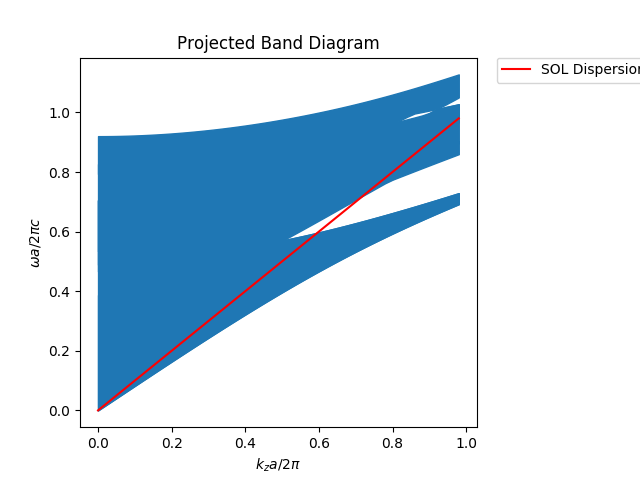

In [35]:
fig_projected_03, ax_projected_03 = plot_projected_bands("../Simulation-results/MPB/2d-hexagonal/varied_k_z_r_0.3/")    